In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn-whitegrid")

In [2]:
data = pd.read_feather("sampling_base")
input_vars = pd.read_csv("input_parameters.csv")

In [3]:
input_vars

,Unnamed: 0,capacity_policy,minfood_access_policy,maxfood_access_policy,day_access_policy,rerouting_policy,alpha,beta,gamma,epsilon
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.1
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.5
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.1
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.5
...,...,...,...,...,...,...,...,...,...,...
67,67,0.0,0.0,0.0,0.0,0.0,0.5,1.0,7.0,0.5
68,68,0.0,0.0,0.0,0.0,0.0,0.5,1.0,7.0,1.0
69,69,0.0,0.0,0.0,0.0,0.0,0.5,1.0,21.0,0.1
70,70,0.0,0.0,0.0,0.0,0.0,0.5,1.0,21.0,0.5


/home/daan/miniconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/daan/miniconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8712 missing from current font.
  font.set_text(s, 0, flags=flags)


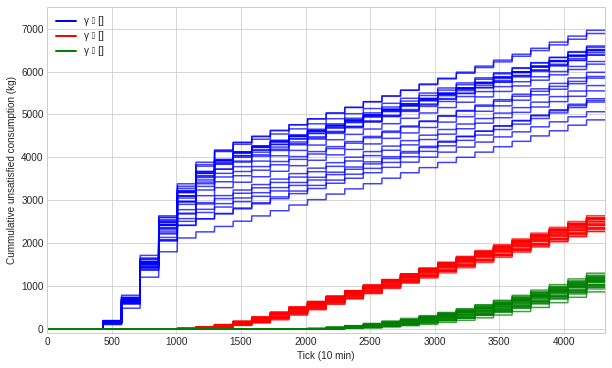

In [15]:
# dict to store relevant indices
d = {}
d[0] = list()
d[1] = list()
d[2] = list()

fig = plt.figure(figsize=(10,6))

for i in range(len(input_vars)):
    plotdata = data.o1[data.o0==i]
    if plotdata.iloc[4319] < 1500:
        d[2].append(i)
    else:
        if plotdata.iloc[4319] < 3000:
            d[1].append(i)
        else:
            d[0].append(i) 
            
# x vector to plot            
x = np.linspace(0,4319,4320) 

# plot batch per color
for i in d:    
    for j in d[i]:
        if i == 0:
            plt.plot( x, data.o1[data.o0==j],color='blue', alpha=.75)
#             plt.legend(["lala"]);
        if i == 1:
            plt.plot( x, data.o1[data.o0==j],color='red', alpha=.75 )
        if i == 2:
            plt.plot( x, data.o1[data.o0==j],color='green', alpha=.75 )
            
# graph layout
# plt.title("")
plt.ylabel("Cummulative unsatisfied consumption (kg)")
plt.xlabel("Tick (10 min)")
plt.xlim([0,4320])

from matplotlib.lines import Line2D

colors = ['blue', 'red', 'green']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['γ ∈ []', 'γ ∈ []', 'γ ∈ []']
plt.legend(lines, labels)
plt.ylim([-100,7500]);


Text(0.5, 0, 'Model parameter')

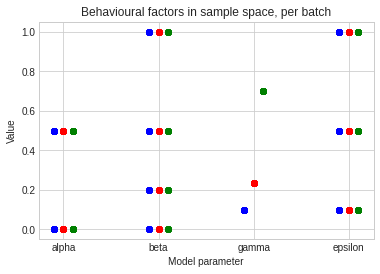

In [9]:
# 
for i in d:    
    for j in d[i]:
        if i == 0:
            plt.plot( 1, input_vars.alpha[j],'bo' )
            plt.plot( 2, input_vars.beta[j],'bo' )
            plt.plot( 3, input_vars.gamma[j]/30.,'bo' )
            plt.plot( 4, input_vars.epsilon[j],'bo' )
        if i == 1:
            plt.plot( 1.1, input_vars.alpha[j],'ro' )
            plt.plot( 2.1, input_vars.beta[j],'ro' )
            plt.plot( 3.1, input_vars.gamma[j]/30.,'ro' )
            plt.plot( 4.1, input_vars.epsilon[j],'ro' )
        if i == 2:
            plt.plot( 1.2, input_vars.alpha[j],'go' )
            plt.plot( 2.2, input_vars.beta[j],'go' )
            plt.plot( 3.2, input_vars.gamma[j]/30.,'go' )
            plt.plot( 4.2, input_vars.epsilon[j],'go' )
           
# graph layout
plt.title("Behavioural factors in sample space, per batch");
plt.ylabel("Value");
plt.xticks([1.1,2.1,3.1,4.1],["alpha","beta","gamma","epsilon"]);
plt.xlabel("Model parameter")

In [95]:
input_vars = input_vars.iloc[:,1:]

In [103]:
input_vars["gamma"] = input_vars["gamma"] / 30

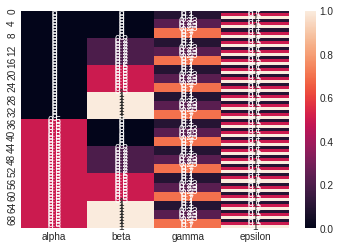

In [108]:
sns.heatmap(input_vars.loc[:,'alpha':], annot=True)

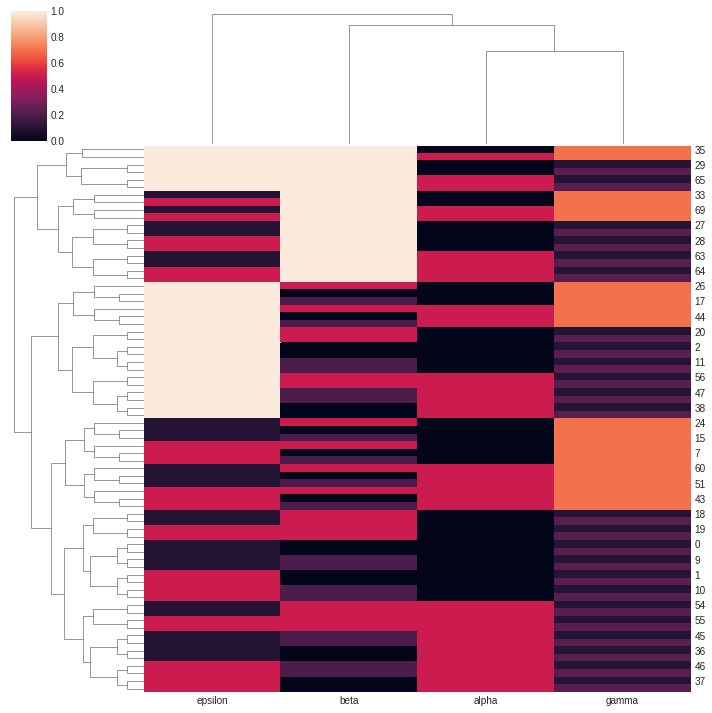

In [105]:
import seaborn as sns
sns.clustermap(input_vars.loc[:,'alpha':])

/home/daan/miniconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/daan/miniconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8712 missing from current font.
  font.set_text(s, 0, flags=flags)


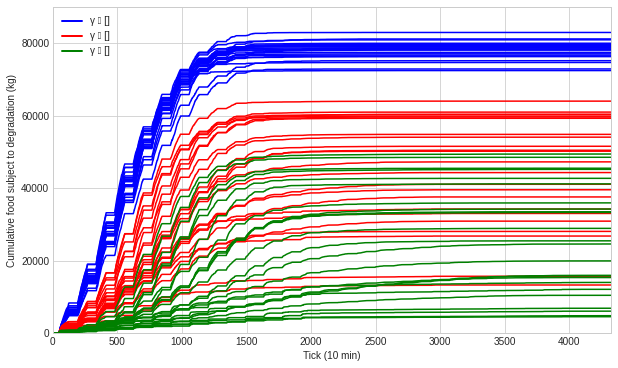

In [14]:
fig = plt.figure(figsize=(10,6))
x = np.linspace(0,4319,4320)
for i in d:    
    for j in d[i]:
        if i == 0:
            plt.plot( x, data.o2[data.o0==j],color='blue' )
        if i == 1:
            plt.plot( x, data.o2[data.o0==j],color='red' )
        if i == 2:
            plt.plot( x, data.o2[data.o0==j],color='green' ) 

# graph layout
# plt.title("Food degradation; base policies;\nsampling beh. factors");
plt.ylabel("Cumulative food subject to degradation (kg)");
plt.xlabel("Tick (10 min)");
plt.xlim([0,4320]);
plt.ylim([-100,90000]);


from matplotlib.lines import Line2D

colors = ['blue', 'red', 'green']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['γ ∈ []', 'γ ∈ []', 'γ ∈ []']
plt.legend(lines, labels)
# plt.ylim([-100,7500]);

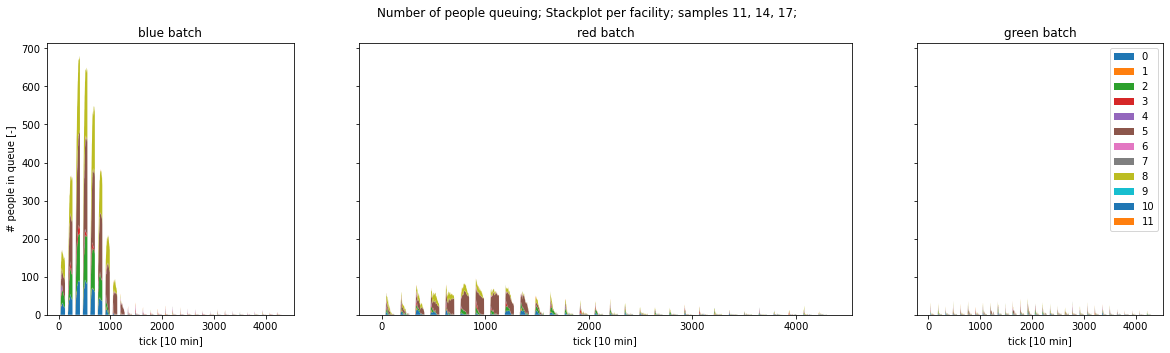

In [66]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
# Data
y = {}
for j in d:
    y[j] = list()
    for i in range(12):
        y[j].append(data[data.o0==d[j][5]].iloc[:,i+3])
    
f, (ax0,ax1, ax2) = plt.subplots(1, 3, sharey=True,figsize=(20,5),gridspec_kw={'width_ratios': [1,2, 1]})

# Plot
ax0.stackplot(x,y[0], labels=range(0,12))
# ax0.legend(loc='upper right')
# ax0.set_xlim([0,1000])
ax0.set_xlabel("tick [10 min]")
ax0.set_ylabel("# people in queue [-]")
ax0.set_title("blue batch")

ax1.stackplot(x,y[1], labels=range(0,12))
# ax1.legend(loc='upper right')
# ax1.set_xlim([0,2000])
ax1.set_xlabel("tick [10 min]")
# ax1.set_ylabel("# people in queue [-]")
ax1.set_title("red batch")

ax2.stackplot(x,y[2], labels=range(0,12))
ax2.legend(loc='upper right')
# ax2.set_xlim([0,1000])
ax2.set_xlabel("tick [10 min]")
# ax2.set_ylabel("# people in queue [-]")
ax2.set_title("green batch")


f.suptitle('Number of people queuing; Stackplot per facility; samples %s, %s, %s;'%(d[0][5],d[1][5],d[2][5]));

plt.show()

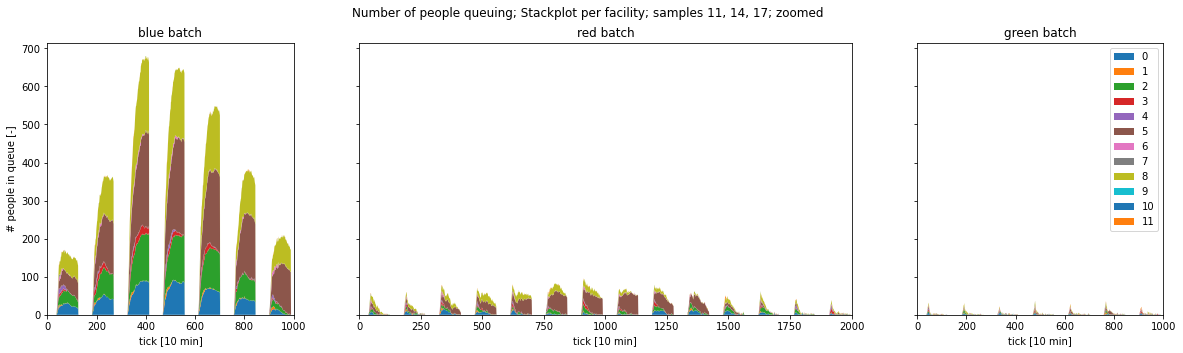

In [65]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
# Data
y = {}
for j in d:
    y[j] = list()
    for i in range(12):
        y[j].append(data[data.o0==d[j][5]].iloc[:,i+3])
    
f, (ax0,ax1, ax2) = plt.subplots(1, 3, sharey=True,figsize=(20,5),gridspec_kw={'width_ratios': [1,2, 1]})

# Plot
ax0.stackplot(x,y[0], labels=range(0,12))
# ax0.legend(loc='upper right')
ax0.set_xlim([0,1000])
ax0.set_xlabel("tick [10 min]")
ax0.set_ylabel("# people in queue [-]")
ax0.set_title("blue batch")

ax1.stackplot(x,y[1], labels=range(0,12))
# ax1.legend(loc='upper right')
ax1.set_xlim([0,2000])
ax1.set_xlabel("tick [10 min]")
# ax1.set_ylabel("# people in queue [-]")
ax1.set_title("red batch")

ax2.stackplot(x,y[2], labels=range(0,12))
ax2.legend(loc='upper right')
ax2.set_xlim([0,1000])
ax2.set_xlabel("tick [10 min]")
# ax2.set_ylabel("# people in queue [-]")
ax2.set_title("green batch")


f.suptitle('Number of people queuing; Stackplot per facility; samples %s, %s, %s; zoomed'%(d[0][5],d[1][5],d[2][5]));

plt.show()

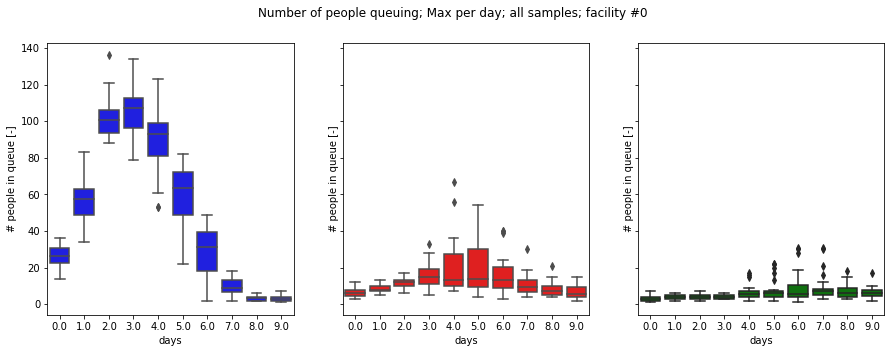

In [53]:


# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True,figsize = (15,5))
zoom_to_day = 10
facility_number = 0


y = {}


for k in d:
    y[k] = [list(),list()]

    for j in d[k]:


        for i in range(0,30):
            indexmin = i*144 + 4320*j
            indexmax = (i+1)*144 +4320*j
            maxval = data.iloc[indexmin:indexmax,facility_number+3].max()
            y[k][0].append(i)
            y[k][1].append(maxval)
                
plotdata = pd.DataFrame(np.transpose(y[0]),columns=["days","vals"])
sns.boxplot(x = "days", y = "vals" ,data=plotdata[plotdata.days<zoom_to_day] ,ax=ax1,color='blue')
ax1.set_ylabel("# people in queue [-]")
# ax1.set_title('Sharing Y axis')

plotdata = pd.DataFrame(np.transpose(y[1]),columns=["days","vals"])
sns.boxplot(x = "days", y = "vals" ,data=plotdata[plotdata.days<zoom_to_day],ax=ax2, color='red' )
ax2.set_ylabel("# people in queue [-]")
# ax2.set_title('Sharing Y axis')

plotdata = pd.DataFrame(np.transpose(y[2]),columns=["days","vals"])
sns.boxplot(x = "days", y = "vals" ,data=plotdata[plotdata.days<zoom_to_day],ax=ax3, color='green' )
ax3.set_ylabel("# people in queue [-]")
# ax3.set_title('Sharing Y axis')
# ax2.scatter(x, y)

f.suptitle('Number of people queuing; Max per day; all samples; facility #%s'%facility_number);


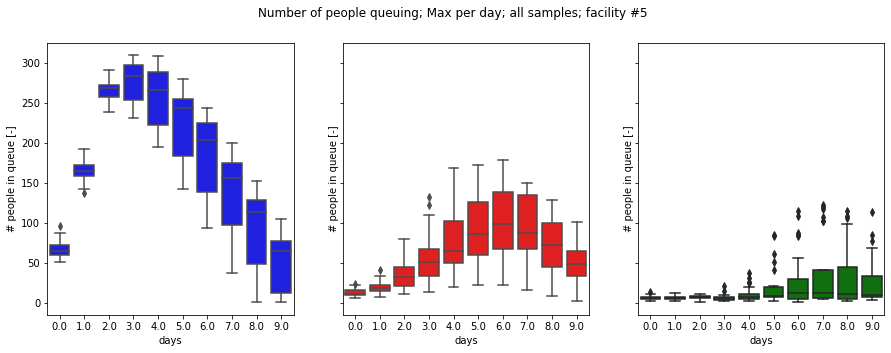

In [52]:

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True,figsize = (15,5))
zoom_to_day = 10
facility_number = 5


y = {}


for k in d:
    y[k] = [list(),list()]

    for j in d[k]:


        for i in range(0,30):
            indexmin = i*144 + 4320*j
            indexmax = (i+1)*144 +4320*j
            maxval = data.iloc[indexmin:indexmax,facility_number+3].max()
            y[k][0].append(i)
            y[k][1].append(maxval)
                
plotdata = pd.DataFrame(np.transpose(y[0]),columns=["days","vals"])
sns.boxplot(x = "days", y = "vals" ,data=plotdata[plotdata.days<zoom_to_day] ,ax=ax1,color='blue')
ax1.set_ylabel("# people in queue [-]")
# ax1.set_title('Sharing Y axis')

plotdata = pd.DataFrame(np.transpose(y[1]),columns=["days","vals"])
sns.boxplot(x = "days", y = "vals" ,data=plotdata[plotdata.days<zoom_to_day],ax=ax2, color='red' )
ax2.set_ylabel("# people in queue [-]")
# ax2.set_title('Sharing Y axis')

plotdata = pd.DataFrame(np.transpose(y[2]),columns=["days","vals"])
sns.boxplot(x = "days", y = "vals" ,data=plotdata[plotdata.days<zoom_to_day],ax=ax3, color='green' )
ax3.set_ylabel("# people in queue [-]")
# ax3.set_title('Sharing Y axis')
# ax2.scatter(x, y)

f.suptitle('Number of people queuing; Max per day; all samples; facility #%s'%facility_number);